### Re-runing with the proper reference sample

Jean sent the proper reference sample. I run NnpzBuildPhotometry on it to generate the photometry, and then run nnpz over 100k of the input.

In [1]:
import nnpz
from astropy.table import Table

In [2]:
ref = nnpz.ReferenceSample('/data/dc3/ReferenceSample/')
print(ref.size())

518404


Run NnpzBuildPhotometry over the just created RefernceSample
```bash
./NnpzBuildPhotometry --sample-dir "/data/dc3/ReferenceSample" --filters "/data/dc3/AuxiliaryData/Filters/Euclid" --out-type F_nu_uJy --out-file "/data/dc3/dc3_F_nu_uJy.fits"
```

In [3]:
photometry = Table.read('/data/dc3/dc3_F_nu_uJy.fits', hdu=1)
photometry[0:5]

ID,g,r,J,Y,i,H,z,u,vis
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32
216439,2.79845,6.23974,15.6645,13.9629,8.51193,18.2761,11.1786,0.638427,7.00802
218604,9.20682,45.0099,188.815,133.947,77.444,222.978,103.189,1.35828,55.8059
219020,77.5733,236.301,778.685,625.669,345.184,914.782,463.316,14.7736,275.204
219656,0.165762,0.178471,0.296531,0.192683,0.181013,0.333025,0.183007,0.0986834,0.178859
219657,0.0306811,0.0396912,0.165203,0.131888,0.0516333,0.208743,0.0873943,0.0220707,0.0448142


In [13]:
photometry_lambda = Table.read('/data/dc3/DC3.2.0_F_lambda.fits', hdu=1)
photometry_lambda[0:5]

ID,g,r,J,Y,i,H,z,u,vis
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32
216439,0.00780618,0.0092537,0.00540401,0.00758704,0.00872465,0.00363316,0.00871057,0.00284716,0.00902161
218604,0.00709301,0.00753299,0.00354284,0.00509306,0.00666605,0.00228456,0.0061858,0.00323129,0.00711058
219020,0.00694116,0.00714534,0.00319733,0.00462758,0.00621838,0.00203948,0.00568171,0.00329203,0.00669232
219656,0.00397959,0.00227214,0.000494291,0.00082343,0.0015671,0.000285457,0.00119335,0.00440326,0.00195099
219657,0.00521885,0.00432763,0.0019829,0.00281661,0.00361508,0.00131018,0.0033643,0.0039178,0.00400876


In [4]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import numpy as np

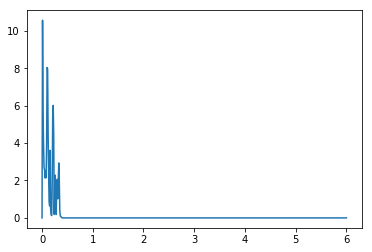

In [5]:
nnpz_out = Table.read('/data/dc3/nnpz/out.fits')
pdz_vals, pdz_bins = nnpz_out[0]['CoaddedPdz'], nnpz_out[0]['CoaddedPdzBins']
pyplot.plot(pdz_bins, pdz_vals)

In [6]:
np.trapz(pdz_vals, pdz_bins)

1.0

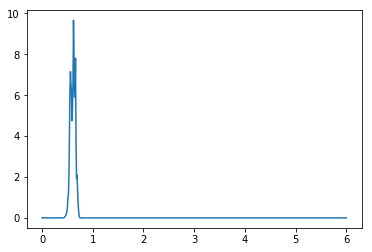

In [7]:
pdz_vals, pdz_bins = nnpz_out[600]['CoaddedPdz'], nnpz_out[600]['CoaddedPdzBins']
pyplot.plot(pdz_bins, pdz_vals)

In [8]:
np.trapz(pdz_vals, pdz_bins)

1.0

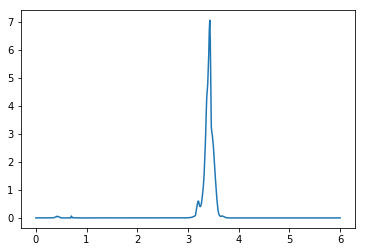

In [9]:
higher_redshift = nnpz_out[nnpz_out['z_true'] > 3][0]
pdz_vals, pdz_bins = higher_redshift['CoaddedPdz'], higher_redshift['CoaddedPdzBins']
pyplot.plot(pdz_bins, pdz_vals)

In [10]:
higher_redshift['z_true']

3.5009999

In [11]:
diff = nnpz_out['Q_50'] - nnpz_out['z_true']
diff=diff[np.isnan(diff)==False]
err=diff*diff

(array([  9.61350000e+04,   9.41000000e+02,   3.60000000e+02,
          2.51000000e+02,   1.59000000e+02,   1.36000000e+02,
          1.56000000e+02,   1.43000000e+02,   1.31000000e+02,
          1.47000000e+02,   1.80000000e+02,   1.48000000e+02,
          1.69000000e+02,   1.53000000e+02,   1.77000000e+02,
          1.76000000e+02,   1.67000000e+02,   1.08000000e+02,
          6.00000000e+01,   3.70000000e+01,   2.80000000e+01,
          1.50000000e+01,   1.00000000e+01,   0.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          5.00000000e+00,   1.00000000e+00,   1.00000000e+00]),
 array([  0.        ,   0.57023919,   1.14047839,   1.71071758,
          2.28095678,   2.85119597,   3.42143517,   3.99167436,
          4.56191355,   5.13215275,   5.70239194,   6.27263114,
          6.84287033,   7.41310953,   7.98334872,   8.55358791,
          9.12382711,   9.6940663 ,  10.2643055 ,  10.83454469,
         11.40478388,  11.97502308,  12.54526227,  13.1155

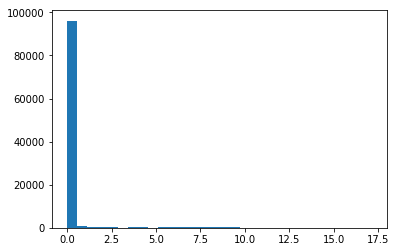

In [13]:
pyplot.hist(err, bins=30)

Looks even better now with the proper data.